# Load and Inspect Data

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])


# Display Raw Data

In [ ]:
print(df)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Convert Labels to Numerical

In [ ]:

# Convert labels to numerical (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display the first few rows of the dataframe
display(df.head())

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Basic Data Exploration

In [ ]:
# Check for missing values
display(df.isnull().sum())

# Get basic info about the dataframe
display(df.info())

# View the distribution of the target variable
display(df['label'].value_counts())

,0
label,0
message,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


None

,count
label,
0,4825
1,747


# Text Preprocessing

In [ ]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\s]', '', regex=True)

# Convert text to lowercase
df['message'] = df['message'].str.lower()

# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


# Display Preprocessed Data

In [ ]:
print((df.head(30)))

    label                                            message
0       0  go jurong point crazy available bugis n great ...
1       0                            ok lar joking wif u oni
2       1  free entry 2 wkly comp win fa cup final tkts 2...
3       0                u dun say early hor u c already say
4       0        nah dont think goes usf lives around though
5       1  freemsg hey darling 3 weeks word back id like ...
6       0     even brother like speak treat like aids patent
7       0  per request melle melle oru minnaminunginte nu...
8       1  winner valued network customer selected receiv...
9       1  mobile 11 months u r entitled update latest co...
10      0  im gonna home soon dont want talk stuff anymor...
11      1  six chances win cash 100 20000 pounds txt csh1...
12      1  urgent 1 week free membership 100000 prize jac...
13      0  ive searching right words thank breather promi...
14      0                                        date sunday
15      1  xxxmobilemovi

# Exploratory Data Analysis (Word Frequency and Message Length)

'Most common words:'

[('u', 1132),
 ('call', 578),
 ('2', 482),
 ('im', 473),
 ('ur', 390),
 ('get', 386),
 ('dont', 298),
 ('4', 293),
 ('go', 281),
 ('ok', 278),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257),
 ('like', 244),
 ('ill', 243),
 ('got', 239),
 ('good', 236),
 ('come', 229),
 ('time', 208),
 ('day', 203)]

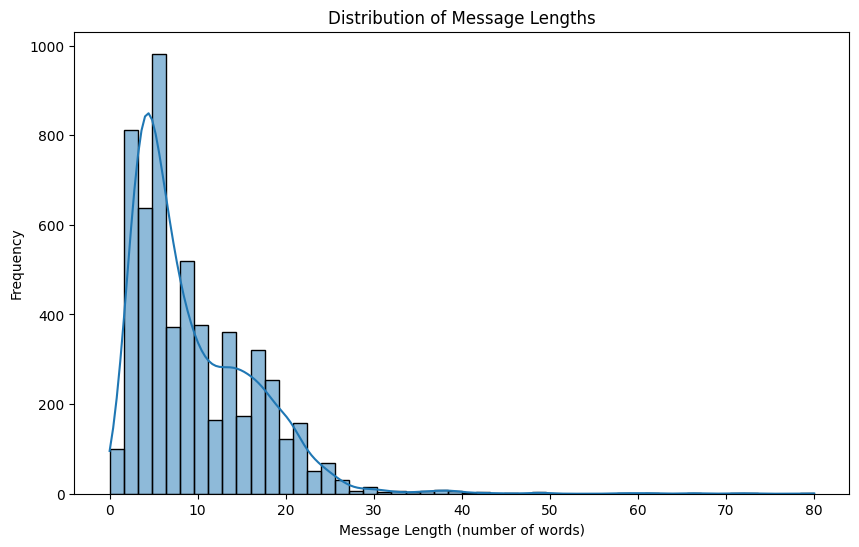

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get all words from the preprocessed messages
all_words = ' '.join(df['message']).split()

# Get the most common words
most_common_words = Counter(all_words).most_common(20)

# Display the most common words
display("Most common words:", most_common_words)

# Plot the distribution of message lengths
df['message_length'] = df['message'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (number of words)')
plt.ylabel('Frequency')
plt.show()

# Model Training and Evaluation (Logistic Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.25, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
display(conf_matrix)

Accuracy: 0.964824120603015
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.74      0.85       186

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393

Confusion Matrix:


array([[1206,    1],
       [  48,  138]])

# Analysis Summary and Next Steps


**1. Data Analysis Key Findings:**

*   The dataset contains 5572 SMS messages with labels indicating whether they are 'ham' (not spam) or 'spam'.
*   There are no missing values in the dataset.
*   The dataset is imbalanced, with a significantly higher number of 'ham' messages (4825) compared to 'spam' messages (747).
*   The text data was preprocessed by removing punctuation, converting to lowercase, and removing stop words.
*   The most common words in the preprocessed messages were identified, with 'u', 'call', and '2' being the most frequent.
*   The distribution of message lengths shows that most messages are relatively short.
*   A Logistic Regression model was trained on the TF-IDF vectorized text data to classify messages as spam or ham.
*   The model achieved an accuracy of approximately 96.5%.
*   The classification report shows high precision and recall for 'ham' messages, but slightly lower recall for 'spam' messages, which is expected given the class imbalance.
*   The confusion matrix indicates that the model correctly classified most of the messages, with a small number of false positives and false negatives.

**2. Insights or Next Steps:**

*   The current model performs well, but the class imbalance might be affecting the performance on the 'spam' class.
*   **Further exploration:** Investigate techniques to handle class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham).
*   **Model improvement:** Experiment with other text vectorization techniques (e.g., Word2Vec, GloVe) and different classification models (e.g., Naive Bayes, Support Vector Machines, or deep learning models like LSTMs or CNNs) to potentially improve performance, especially for detecting spam.
*   **Error analysis:** Analyze the false positives and false negatives from the confusion matrix to understand why the model misclassified those messages and identify potential areas for improvement in preprocessing or feature engineering.
*   **Deployment:** If the performance is satisfactory, the trained model can be saved and deployed to classify new, unseen SMS messages.

# Analysis Summary and Next Steps


**1. Data Analysis Key Findings:**

*   The dataset contains 5572 SMS messages with labels indicating whether they are 'ham' (not spam) or 'spam'.
*   There are no missing values in the dataset.
*   The dataset is imbalanced, with a significantly higher number of 'ham' messages (4825) compared to 'spam' messages (747).
*   The text data was preprocessed by removing punctuation, converting to lowercase, and removing stop words.
*   The most common words in the preprocessed messages were identified, with 'u', 'call', and '2' being the most frequent.
*   The distribution of message lengths shows that most messages are relatively short.
*   A Logistic Regression model was trained on the TF-IDF vectorized text data to classify messages as spam or ham.
*   The model achieved an accuracy of approximately 96.5%.
*   The classification report shows high precision and recall for 'ham' messages, but slightly lower recall for 'spam' messages, which is expected given the class imbalance.
*   The confusion matrix indicates that the model correctly classified most of the messages, with a small number of false positives and false negatives.

**2. Insights or Next Steps:**

*   The current model performs well, but the class imbalance might be affecting the performance on the 'spam' class.
*   **Further exploration:** Investigate techniques to handle class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham).
*   **Model improvement:** Experiment with other text vectorization techniques (e.g., Word2Vec, GloVe) and different classification models (e.g., Naive Bayes, Support Vector Machines, or deep learning models like LSTMs or CNNs) to potentially improve performance, especially for detecting spam.
*   **Error analysis:** Analyze the false positives and false negatives from the confusion matrix to understand why the model misclassified those messages and identify potential areas for improvement in preprocessing or feature engineering.
*   **Deployment:** If the performance is satisfactory, the trained model can be saved and deployed to classify new, unseen SMS messages.

# Analysis Summary and Next Steps


**1. Data Analysis Key Findings:**

*   The dataset contains 5572 SMS messages with labels indicating whether they are 'ham' (not spam) or 'spam'.
*   There are no missing values in the dataset.
*   The dataset is imbalanced, with a significantly higher number of 'ham' messages (4825) compared to 'spam' messages (747).
*   The text data was preprocessed by removing punctuation, converting to lowercase, and removing stop words.
*   The most common words in the preprocessed messages were identified, with 'u', 'call', and '2' being the most frequent.
*   The distribution of message lengths shows that most messages are relatively short.
*   A Logistic Regression model was trained on the TF-IDF vectorized text data to classify messages as spam or ham.
*   The model achieved an accuracy of approximately 96.5%.
*   The classification report shows high precision and recall for 'ham' messages, but slightly lower recall for 'spam' messages, which is expected given the class imbalance.
*   The confusion matrix indicates that the model correctly classified most of the messages, with a small number of false positives and false negatives.

**2. Insights or Next Steps:**

*   The current model performs well, but the class imbalance might be affecting the performance on the 'spam' class.
*   **Further exploration:** Investigate techniques to handle class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham).
*   **Model improvement:** Experiment with other text vectorization techniques (e.g., Word2Vec, GloVe) and different classification models (e.g., Naive Bayes, Support Vector Machines, or deep learning models like LSTMs or CNNs) to potentially improve performance, especially for detecting spam.
*   **Error analysis:** Analyze the false positives and false negatives from the confusion matrix to understand why the model misclassified those messages and identify potential areas for improvement in preprocessing or feature engineering.
*   **Deployment:** If the performance is satisfactory, the trained model can be saved and deployed to classify new, unseen SMS messages.

# Model Training and Evaluation (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.25, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Train a Support Vector Machine model
svm_model = SVC(kernel='linear') # Using a linear kernel as a starting point
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_rep_svm)
print("SVM Confusion Matrix:")
display(conf_matrix_svm)

SVM Accuracy: 0.990667623833453
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       1.00      0.93      0.96       186

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

SVM Confusion Matrix:


array([[1207,    0],
       [  13,  173]])

# **Performance Comparison: Logistic Regression and SVM models based on the results**

Let's compare the performance of the Logistic Regression and SVM models based on the results we obtained:

**Logistic Regression Model:**

Accuracy: 0.9648
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.74      0.85       186

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393
Confusion Matrix:
[[1206    1]
 [  48  138]]

**Support Vector Machine (SVM) Model (with Linear Kernel):**

Accuracy: 0.9907
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       1.00      0.93      0.96       186

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393
Confusion Matrix:
[[1207    0],
 [  13  173]]

**Comparison Summary:**

*   **Accuracy:** The SVM model shows a noticeable improvement in overall accuracy (99.07%) compared to Logistic Regression (96.48%).
*   **Precision (Spam - Class 1):** Both models have very high precision for predicting spam (0.99 for Logistic Regression and 1.00 for SVM). This means that when they predict a message is spam, it is very likely to actually be spam.
*   **Recall (Spam - Class 1):** This is where the SVM model significantly outperforms Logistic Regression. The SVM model correctly identifies 93% of the actual spam messages (recall = 0.93), while the Logistic Regression model only identifies 74% (recall = 0.74). This is crucial for a spam filter, as you want to catch as much spam as possible.
*   **F1-score (Spam - Class 1):** The F1-score, which is the harmonic mean of precision and recall, is also higher for the SVM model (0.96) compared to Logistic Regression (0.85), reflecting its better balance between precision and recall for the spam class.
*   **Confusion Matrix:**
    *   **True Positives (Spam correctly identified):** SVM has more true positives (173) than Logistic Regression (138).
    *   **False Negatives (Spam incorrectly classified as Ham):** SVM has significantly fewer false negatives (13) than Logistic Regression (48). This aligns with the higher recall for spam.
    *   **True Negatives (Ham correctly identified):** Both models are very good at identifying ham messages.
    *   **False Positives (Ham incorrectly classified as Spam):** The Logistic Regression model had 1 false positive, while the SVM model had 0 false positives. This means the SVM model, in this specific test set, did not flag any legitimate ham messages as spam.

**Conclusion:**

Based on these metrics, the Support Vector Machine model with a linear kernel performed better than the Logistic Regression model for this spam detection task, particularly in its ability to correctly identify spam messages (higher recall and F1-score for the spam class, and fewer false negatives).

# Analysis Summary and Next Steps


**1. Data Analysis Key Findings:**

*   The dataset contains 5572 SMS messages with labels indicating whether they are 'ham' (not spam) or 'spam'.
*   There are no missing values in the dataset.
*   The dataset is imbalanced, with a significantly higher number of 'ham' messages (4825) compared to 'spam' messages (747).
*   The text data was preprocessed by removing punctuation, converting to lowercase, and removing stop words.
*   The most common words in the preprocessed messages were identified, with 'u', 'call', and '2' being the most frequent.
*   The distribution of message lengths shows that most messages are relatively short.
*   A Logistic Regression model was trained on the TF-IDF vectorized text data to classify messages as spam or ham.
*   The model achieved an accuracy of approximately 96.5%.
*   The classification report shows high precision and recall for 'ham' messages, but slightly lower recall for 'spam' messages, which is expected given the class imbalance.
*   The confusion matrix indicates that the model correctly classified most of the messages, with a small number of false positives and false negatives.

**2. Insights or Next Steps:**

*   The current model performs well, but the class imbalance might be affecting the performance on the 'spam' class.
*   **Further exploration:** Investigate techniques to handle class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham).
*   **Model improvement:** Experiment with other text vectorization techniques (e.g., Word2Vec, GloVe) and different classification models (e.g., Naive Bayes, Support Vector Machines, or deep learning models like LSTMs or CNNs) to potentially improve performance, especially for detecting spam.
*   **Error analysis:** Analyze the false positives and false negatives from the confusion matrix to understand why the model misclassified those messages and identify potential areas for improvement in preprocessing or feature engineering.
*   **Deployment:** If the performance is satisfactory, the trained model can be saved and deployed to classify new, unseen SMS messages.